# 2008 Airline on time dataset
## by Vincent Khor

## Preliminary Wrangling

> Briefly introduce your dataset here. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Load necessary csv files.
flights = pd.read_csv('flights_2008.csv')

In [3]:
print('There are '+ str(flights.shape[0]) +' rows and ' + str(flights.shape[1]) + ' columns in this dataset.')

There are 2389217 rows and 29 columns in this dataset.


In [4]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [5]:
# Converting column names to be more descriptive
col_name = {'Year':'year', 'Month':'month', 'DayofMonth':'day_of_month','DayOfWeek':'day_of_week',
            'DepTime':'actual_dep_time','CRSDepTime':'scheduled_dep_time','ArrTime':'actual_arr_time',
            'CRSArrTime':'scheduled_arr_time','UniqueCarrier':'carrier_code','FlightNum':'flight_number',
            'TailNum':'tail_number','ActualElapsedTime':'actual_elapsed_time','CRSElapsedTime':'scheduled_elapsed_time',
            'AirTime':'air_time','ArrDelay':'arr_delay','DepDelay':'dep_delay','Origin':'origin','Dest':'destination',
            'Distance':'distance','TaxiIn':'taxi_in_time','TaxiOut':'taxi_out_time','Cancelled':'cancelled',
            'CancellationCode':'cancellation_code','Diverted':'diverted','CarrierDelay':'carrier_delay',
            'WeatherDelay':'weather_delay','NASDelay':'nas_delay', 'SecurityDelay':'security_delay',
            'LateAircraftDelay':'late_aircraft_delay'}
flights=flights.rename(columns=col_name)

In [6]:
flights.head()

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [7]:
# Display basic information
flights.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   year                    2389217 non-null  int64  
 1   month                   2389217 non-null  int64  
 2   day_of_month            2389217 non-null  int64  
 3   day_of_week             2389217 non-null  int64  
 4   actual_dep_time         2324775 non-null  float64
 5   scheduled_dep_time      2389217 non-null  int64  
 6   actual_arr_time         2319121 non-null  float64
 7   scheduled_arr_time      2389217 non-null  int64  
 8   carrier_code            2389217 non-null  object 
 9   flight_number           2389217 non-null  int64  
 10  tail_number             2346765 non-null  object 
 11  actual_elapsed_time     2319121 non-null  float64
 12  scheduled_elapsed_time  2388810 non-null  float64
 13  air_time                2319121 non-null  float64
 14  ar

In [8]:
# replace 'day of week' values
day = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
flights['day_of_week'].replace(day, inplace=True)

In [9]:
# Set day order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
day_order = pd.api.types.CategoricalDtype(ordered=True, categories=days)
flights['day_of_week'] = flights['day_of_week'].astype(day_order);

In [10]:
flights['day_of_week'].unique()

['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [11]:
flights.head()

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008,1,3,Thursday,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,Thursday,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,Thursday,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,Thursday,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,Thursday,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [12]:
flights.day_of_week.value_counts()

Wednesday    365560
Tuesday      358942
Friday       350566
Thursday     349831
Monday       347984
Sunday       328237
Saturday     288097
Name: day_of_week, dtype: int64

Columns to convert:
- actual_dep_time
- scheduled_dep_time
- actual_arr_time
- scheduled_arr_time

In [13]:
##### Check code, changes are not staying in place..
# Columns to convert
convert_col = [flights['actual_dep_time'],
               flights['scheduled_dep_time'],
               flights['actual_arr_time'],
               flights['scheduled_arr_time']]

for column_name in convert_col:
        #Convert to string
        column_name = column_name.astype(str)
        print(column_name.head)
        # remove .0 if present
        column_name = column_name.str.replace('\.0','')
        print(column_name.head)
        # pad string so it is 4 digits 
        column_name = column_name.str.zfill(4)
        print(column_name.head)
        # Convert to format HH:MM
        column_name = column_name.apply(lambda x:"{}:{}".format(x[:2],x[2:]))
    
        print(column_name.head)

<bound method NDFrame.head of 0          1343.0
1          1125.0
2          2009.0
3           903.0
4          1423.0
            ...  
2389212    1025.0
2389213    1319.0
2389214    1335.0
2389215    1933.0
2389216     621.0
Name: actual_dep_time, Length: 2389217, dtype: object>
<bound method NDFrame.head of 0          1343
1          1125
2          2009
3           903
4          1423
           ... 
2389212    1025
2389213    1319
2389214    1335
2389215    1933
2389216     621
Name: actual_dep_time, Length: 2389217, dtype: object>
<bound method NDFrame.head of 0          1343
1          1125
2          2009
3          0903
4          1423
           ... 
2389212    1025
2389213    1319
2389214    1335
2389215    1933
2389216    0621
Name: actual_dep_time, Length: 2389217, dtype: object>
<bound method NDFrame.head of 0          13:43
1          11:25
2          20:09
3          09:03
4          14:23
           ...  
2389212    10:25
2389213    13:19
2389214    13:35
2389215    1

In [14]:
flights.head()

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008,1,3,Thursday,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,Thursday,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,Thursday,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,Thursday,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,Thursday,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


Some attempts below


In [15]:
flight = flights.copy()

In [16]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   year                    int64   
 1   month                   int64   
 2   day_of_month            int64   
 3   day_of_week             category
 4   actual_dep_time         float64 
 5   scheduled_dep_time      int64   
 6   actual_arr_time         float64 
 7   scheduled_arr_time      int64   
 8   carrier_code            object  
 9   flight_number           int64   
 10  tail_number             object  
 11  actual_elapsed_time     float64 
 12  scheduled_elapsed_time  float64 
 13  air_time                float64 
 14  arr_delay               float64 
 15  dep_delay               float64 
 16  origin                  object  
 17  destination             object  
 18  distance                int64   
 19  taxi_in_time            float64 
 20  taxi_out_time           float64 
 21  cancelle

**This method below works but try making it into a function/loop also for other columns**

In [17]:
# Convert to string format
flight['actual_dep_time'] = flight['actual_dep_time'].astype(str)
flight['actual_dep_time'].head()

0    1343.0
1    1125.0
2    2009.0
3     903.0
4    1423.0
Name: actual_dep_time, dtype: object

In [18]:
# remove .0 if needed
flight['actual_dep_time'] = flight['actual_dep_time'].str.replace('\.0','')
flight['actual_dep_time'].head()

0    1343
1    1125
2    2009
3     903
4    1423
Name: actual_dep_time, dtype: object

In [19]:
# pad string so it is 4 digits 
flight['actual_dep_time'] = flight['actual_dep_time'].str.zfill(4)
flight['actual_dep_time'].head()

0    1343
1    1125
2    2009
3    0903
4    1423
Name: actual_dep_time, dtype: object

In [20]:
#flight['actual_dep_time'] = flight['actual_dep_time'].apply(lambda x:"{}:{}:{}".format(x[:2],x[2:],'00'))
flight['actual_dep_time'] = flight['actual_dep_time'].apply(lambda x:"{}:{}".format(x[:2],x[2:]))
flight['actual_dep_time'].head()

0    13:43
1    11:25
2    20:09
3    09:03
4    14:23
Name: actual_dep_time, dtype: object

In [21]:
flight.head()

,year,month,day_of_month,day_of_week,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008,1,3,Thursday,13:43,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,Thursday,11:25,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,Thursday,20:09,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,Thursday,09:03,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,Thursday,14:23,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [22]:
## remove flight['actual_dep_time'] = pd.to_datetime(flight['actual_dep_time'], format='HHMM', errors='ignore')

In [23]:
## will 24:00:00 be an issue, check later
flight['actual_dep_time'].sort_values()

437245     00:01
1498263    00:01
876860     00:01
904647     00:01
2089915    00:01
           ...  
554410     24:00
162932     24:00
1323215    24:00
1063473    24:00
1925239    24:00
Name: actual_dep_time, Length: 2389217, dtype: object

In [24]:
flight.loc[1925239]

year                          2008
month                            4
day_of_month                    10
day_of_week               Thursday
actual_dep_time              24:00
scheduled_dep_time            2200
actual_arr_time                116
scheduled_arr_time            2324
carrier_code                    YV
flight_number                 7117
tail_number                 N77195
actual_elapsed_time             76
scheduled_elapsed_time          84
air_time                        58
arr_delay                      112
dep_delay                      120
origin                         IAD
destination                    CAE
distance                       401
taxi_in_time                     4
taxi_out_time                   14
cancelled                        0
cancellation_code              NaN
diverted                         0
carrier_delay                  112
weather_delay                    0
nas_delay                        0
security_delay                   0
late_aircraft_delay 

In [25]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   year                    int64   
 1   month                   int64   
 2   day_of_month            int64   
 3   day_of_week             category
 4   actual_dep_time         object  
 5   scheduled_dep_time      int64   
 6   actual_arr_time         float64 
 7   scheduled_arr_time      int64   
 8   carrier_code            object  
 9   flight_number           int64   
 10  tail_number             object  
 11  actual_elapsed_time     float64 
 12  scheduled_elapsed_time  float64 
 13  air_time                float64 
 14  arr_delay               float64 
 15  dep_delay               float64 
 16  origin                  object  
 17  destination             object  
 18  distance                int64   
 19  taxi_in_time            float64 
 20  taxi_out_time           float64 
 21  cancelle

Need to convert above to HH:MM.

## update notes
**Need to update variable names in description of variables.**
- merge airport locations?
- update string to time in HH:MM for columns with time
- 

In [26]:
flights.describe()

,year,month,day_of_month,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,flight_number,actual_elapsed_time,scheduled_elapsed_time,...,distance,taxi_in_time,taxi_out_time,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,2389217.0,2.389217e+06,2.389217e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.389217e+06,2.389217e+06,2.319121e+06,2.388810e+06,...,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2008.0,2.505009e+00,1.566386e+01,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213888e+03,1.286189e+02,1.293776e+02,...,7.261589e+02,6.839862e+00,1.668584e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,0.0,1.121493e+00,8.750405e+00,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951392e+03,7.025303e+01,6.948246e+01,...,5.571763e+02,4.846435e+00,1.102905e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,...,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,8.000000e+00,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,8.000000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,1.600000e+01,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,1.110000e+02,...,5.830000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,2.300000e+01,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,1.600000e+02,...,9.570000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,4.000000e+00,3.100000e+01,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,1.435000e+03,...,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


save dataset as new csv..

In [27]:
copy dataset before analysis

SyntaxError: invalid syntax (<ipython-input-27-759dd4e1c5b5>, line 1)

In [28]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   year                    int64   
 1   month                   int64   
 2   day_of_month            int64   
 3   day_of_week             category
 4   actual_dep_time         float64 
 5   scheduled_dep_time      int64   
 6   actual_arr_time         float64 
 7   scheduled_arr_time      int64   
 8   carrier_code            object  
 9   flight_number           int64   
 10  tail_number             object  
 11  actual_elapsed_time     float64 
 12  scheduled_elapsed_time  float64 
 13  air_time                float64 
 14  arr_delay               float64 
 15  dep_delay               float64 
 16  origin                  object  
 17  destination             object  
 18  distance                int64   
 19  taxi_in_time            float64 
 20  taxi_out_time           float64 
 21  cancelle

### What is the structure of your dataset?

This flight dataset contains 2,389,217 rows of data with 29 different variables that have been recorded.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in examining which variables are best for predicting whether a flight is likely to be delayed, cancelled or diverted.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that will help support my investigation will be time variables as well as reasons for the delays, cancellations and diversions.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [53]:
(flights.cancelled==0).sum()

2324775

/Users/vincentkhor/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


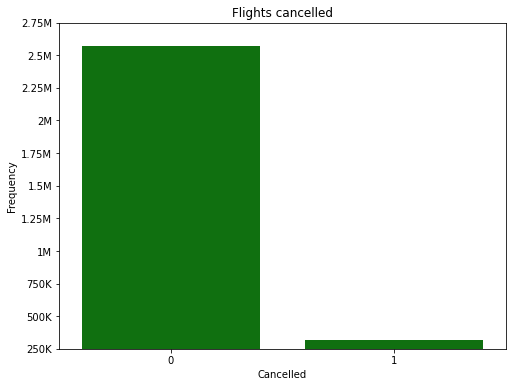

In [70]:
# Cancelled flights
plt.figure(figsize=(8,6))
# Plot barchart
sns.countplot(flights['cancelled'], color='green')

# labels
ticks = np.arange(0,275e4,25e4)
plt.yticks(ticks,['250K','500K','750K','1M','1.25M','1.5M','1.75M','2M','2.25M','2.5M','2.75M'])
plt.ylabel('Frequency')
plt.xlabel('Cancelled')
plt.title('Flights cancelled');

Only a small proportion of flights are cancelled as shown in the bar chart above.

In [30]:
flights.month.unique()

array([1, 2, 3, 4])

In [31]:
flights.day_of_week.unique()

['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [32]:
flight.day_of_week.value_counts().values

array([365560, 358942, 350566, 349831, 347984, 328237, 288097])

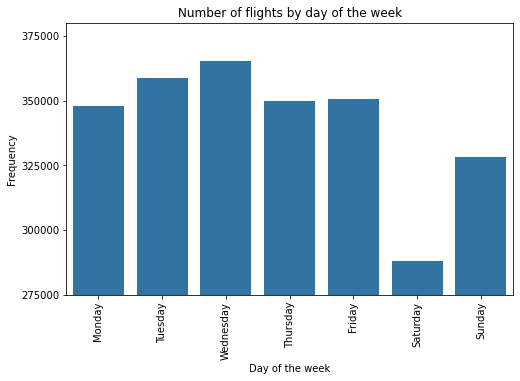

In [33]:
plt.figure(figsize=(8,5))
base_colour = sns.color_palette()[0]
sns.countplot(data=flight,x='day_of_week',color=base_colour)

# labels
tick_locs = np.arange(275000,flight['day_of_week'].value_counts().values.max()+25000,25000)
plt.xticks(rotation=90)
plt.yticks(tick_locs) # set y ticks
plt.ylim([275e3,38e4]) # set y axis limits
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.title('Number of flights by day of the week');

The bar graph above shows that the frequency of flights differs depending on the day of the week. Weekends have the fewest number of flights whilst wednesdays have the most. I will later be examining whether the day of the week affects the proportion of delayed/diverted/cancelled flights

In [34]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   year                    int64   
 1   month                   int64   
 2   day_of_month            int64   
 3   day_of_week             category
 4   actual_dep_time         float64 
 5   scheduled_dep_time      int64   
 6   actual_arr_time         float64 
 7   scheduled_arr_time      int64   
 8   carrier_code            object  
 9   flight_number           int64   
 10  tail_number             object  
 11  actual_elapsed_time     float64 
 12  scheduled_elapsed_time  float64 
 13  air_time                float64 
 14  arr_delay               float64 
 15  dep_delay               float64 
 16  origin                  object  
 17  destination             object  
 18  distance                int64   
 19  taxi_in_time            float64 
 20  taxi_out_time           float64 
 21  cancelle

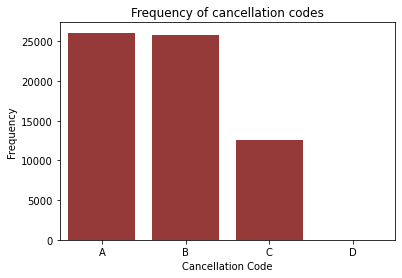

In [35]:
# Cancellation code count
code_order = ['A','B','C','D']
sns.countplot(data=flights,x='cancellation_code',order=code_order,color='brown')
plt.xlabel('Cancellation Code')
plt.ylabel('Frequency')
plt.title('Frequency of cancellation codes');

In [36]:
flights.cancellation_code.value_counts()

A    26075
B    25744
C    12617
D        6
Name: cancellation_code, dtype: int64

The graph above shows that the most common cancellation code is A (Carrier) followed by B (weather). C (NAS), is much less frequent, approximately half as frequent as A and B. D was the least common, there were only 6 instances where a flight was cancelled due to security issues.

In [37]:
flights.distance.describe()

count    2.389217e+06
mean     7.261589e+02
std      5.571763e+02
min      1.700000e+01
25%      3.250000e+02
50%      5.830000e+02
75%      9.570000e+02
max      4.962000e+03
Name: distance, dtype: float64

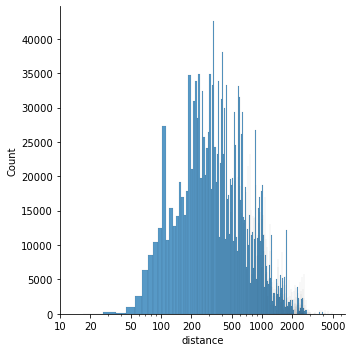

In [38]:
# Flight distance count

sns.displot(flights.distance)
plt.xscale('log')
tick_loc = [10,20,50,100,200,500,1000,2000,5000]
plt.xticks(tick_loc,tick_loc);

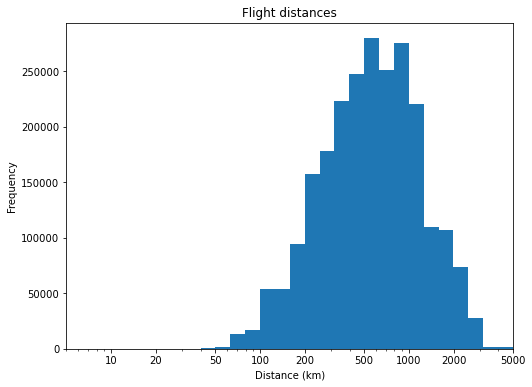

In [39]:
# Flight distances
plt.figure(figsize=(8,6))
# Select bin size
bins = 10 ** np.arange(-1,3.7+0.1,0.1)

# Plot graph
plt.hist(data=flights,x='distance', bins=bins)

# set x axes scale
plt.xscale('log')

# set x axes labels (custom)
ticks = [10,20,50,100,200,500,1000,2000,5000]
labels = ['{}'.format(v) for v in ticks]

# Labels and title
plt.xticks(ticks,labels)
plt.title('Flight distances')
plt.ylabel('Frequency')
plt.xlabel('Distance (km)')
plt.xlim(5,5000);

The graph above shows that the most common flight distance is between 500-1000km. Some flights were up to 5,000km whilst others were less than 50km.

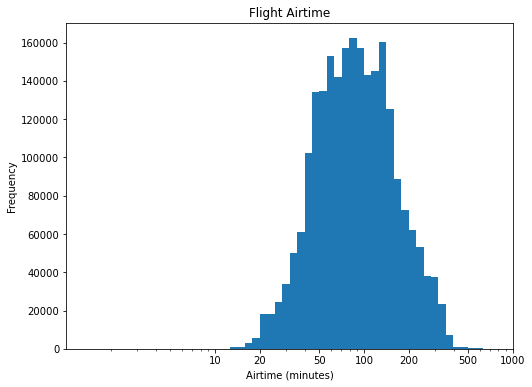

In [40]:
# Flight airtimes
plt.figure(figsize=(8,6))
# Select bin size
bins = 10 ** np.arange(-1,3+0.05,0.05)

# Plot graph
plt.hist(data=flights,x='air_time',bins=bins)

# set x axes scale
plt.xscale('log')

# set x axes labels (custom)
ticks = [10,20,50,100,200,500,1000]
labels = ['{}'.format(v) for v in ticks]

# Labels and title
plt.xticks(ticks,labels)
plt.title('Flight Airtime')
plt.ylabel('Frequency')
plt.xlabel('Airtime (minutes)')
plt.xlim(1,1000);

The airtime for most flights was around 100mins. 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

ideas:
- distance vs cancellation
- carrier vs acncellation

In [41]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   year                    int64   
 1   month                   int64   
 2   day_of_month            int64   
 3   day_of_week             category
 4   actual_dep_time         float64 
 5   scheduled_dep_time      int64   
 6   actual_arr_time         float64 
 7   scheduled_arr_time      int64   
 8   carrier_code            object  
 9   flight_number           int64   
 10  tail_number             object  
 11  actual_elapsed_time     float64 
 12  scheduled_elapsed_time  float64 
 13  air_time                float64 
 14  arr_delay               float64 
 15  dep_delay               float64 
 16  origin                  object  
 17  destination             object  
 18  distance                int64   
 19  taxi_in_time            float64 
 20  taxi_out_time           float64 
 21  cancelle

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

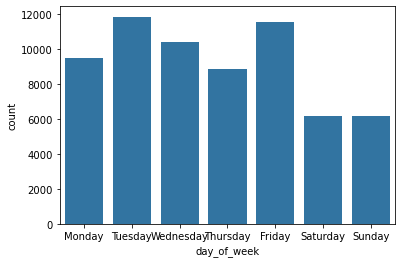

In [42]:
# Create subset of cancelled flights
flight_cancelled = flights[flights.cancelled==1]
sns.countplot(data=flight_cancelled,x='day_of_week',color=base_colour)

The graph above shows the total number of cancellations by day of the week. This shows that by number, there were fewest cancellations on weekends. However, as the number of flight varies by day, it would be more appropriate to calculate the proportion of cancelled flights by day.


split by day, cal average since it is boolean.

In [43]:
# Calculate the overall proportion of cancelled flights
flights.cancelled.mean()

0.026972016355148988

This shows that there is currently a 2.7% chance of a flight being cancelled, however, how does this rate differ when we group by day?

In [44]:
day_means = flights.groupby('day_of_week',as_index=False).mean()
day_means

,day_of_week,year,month,day_of_month,actual_dep_time,scheduled_dep_time,actual_arr_time,scheduled_arr_time,flight_number,actual_elapsed_time,...,distance,taxi_in_time,taxi_out_time,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,Monday,2008.0,2.538326,16.662427,1337.432329,1326.345875,1483.516253,1494.241620,2223.238606,127.840537,...,718.140423,6.789648,16.662573,0.027263,0.002411,15.205456,2.832423,17.176851,0.063401,21.915250
1,Tuesday,2008.0,2.516604,15.038834,1338.620419,1329.775281,1487.662296,1498.985775,2209.909980,128.199643,...,716.673658,6.787882,16.827042,0.032989,0.002948,14.410787,3.413183,19.853936,0.057804,21.330322
2,Wednesday,2008.0,2.512635,15.975378,1338.287031,1329.625219,1487.177718,1496.460349,2224.709016,126.991325,...,716.951726,6.737166,16.437661,0.028373,0.002005,16.220910,2.546370,15.513615,0.091550,19.110645
3,Thursday,2008.0,2.418448,16.151239,1339.150502,1330.501742,1481.293089,1495.155126,2220.490194,128.371085,...,720.152496,6.816513,17.056830,0.025246,0.001961,15.256342,2.416968,15.293218,0.067935,20.496608
4,Friday,2008.0,2.476156,15.355508,1344.452847,1331.347204,1480.327936,1494.508252,2218.707864,129.039905,...,720.630766,6.974399,17.438517,0.032955,0.002450,14.689068,3.323300,16.869267,0.075751,22.274958
5,Saturday,2008.0,2.540037,14.643919,1304.134922,1294.008879,1463.957429,1466.883508,2190.617007,131.175208,...,761.042677,6.816639,15.951889,0.021475,0.002711,18.784656,3.368545,13.521873,0.129315,19.501886
6,Sunday,2008.0,2.540844,15.646847,1373.811375,1364.097326,1514.565733,1527.551370,2204.514317,129.266385,...,736.974394,6.965339,16.289207,0.018797,0.002127,16.820891,2.666687,13.897001,0.092995,21.432724


<Figure size 576x432 with 0 Axes>

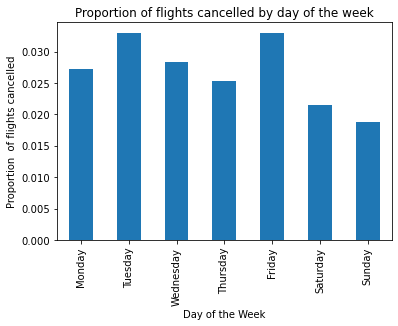

In [45]:
plt.figure(figsize=(8,6))
day_means.plot.bar(x='day_of_week',y='cancelled',legend=False);
# Labels

plt.xlabel('Day of the Week')
plt.ylabel('Proportion  of flights cancelled')
plt.title('Proportion of flights cancelled by day of the week');

This now shows that the rate of cancellations does differ from day to day. The days with the highest proportion of cancelled flights are Tuesday and Fridays, Saturday and Sundays have the lowest proportion of cancellations.

compare whether certain airports have a higher proportion of cancelled flights.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

notes: try plotting long vs lat vs one other variable.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!